# CatTSunami Tutorial

In [1]:
from ocpneb.core.reaction import Reaction
from ocdata.core import Slab, Adsorbate, Bulk, AdsorbateSlabConfig
from ocpmodels.common.relaxation.ase_utils import OCPCalculator
from ase.optimize import BFGS
from x3dase.visualize import view_x3d_n
from ase.io import read
from x3dase.x3d import X3D
from ocpneb.configs.paths import DISSOCIATION_REACTION_DB_PATH, CHECKPOINT_PATH
from ocdata.configs.paths import ADSORBATES_PKL_PATH, BULK_PKL_PATH
import matplotlib.pyplot as plt
from ocpneb.core.autoframe import AutoFrameDissociation
from ocpneb.core import OCPNEB
from ase.io import read

#Optional
from IPython.display import Image
from x3dase.x3d import X3D 

## Do enumerations in an AdsorbML style

In [2]:
# Instantiate the reaction class for the reaction of interest
reaction = Reaction(reaction_str_from_db="*CH -> *C + *H",
                    reaction_db_path=DISSOCIATION_REACTION_DB_PATH,
                    adsorbate_db_path = ADSORBATES_PKL_PATH)

In [3]:
# Instantiate our adsorbate class for the reactant and product
reactant = Adsorbate(adsorbate_id_from_db=reaction.reactant1_idx, adsorbate_db_path=ADSORBATES_PKL_PATH)
product1 = Adsorbate(adsorbate_id_from_db=reaction.product1_idx, adsorbate_db_path=ADSORBATES_PKL_PATH)
product2 = Adsorbate(adsorbate_id_from_db=reaction.product2_idx, adsorbate_db_path=ADSORBATES_PKL_PATH)

In [4]:
# Grab the bulk and cut the slab we are interested in
bulk = Bulk(bulk_src_id_from_db="mp-33", bulk_db_path=BULK_PKL_PATH)
slab = Slab.from_bulk_get_specific_millers(bulk = bulk, specific_millers=(0,0,1))

In [5]:
# Perform site enumeration
# For AdsorbML num_sites = 100, but we use 10 here for brevity
reactant_configs = AdsorbateSlabConfig(slab = slab[0], adsorbate = reactant,
                                       mode="random_site_heuristic_placement",
                                       num_sites = 10).atoms_list
product1_configs = AdsorbateSlabConfig(slab = slab[0], adsorbate = product1,
                                      mode="random_site_heuristic_placement",
                                      num_sites = 10).atoms_list
product2_configs = AdsorbateSlabConfig(slab = slab[0], adsorbate = product2,
                                      mode="random_site_heuristic_placement",
                                      num_sites = 10).atoms_list

In [6]:
# Instantiate the calculator
# NOTE: If you have a GPU, use cpu = False
cpu = True
calc = OCPCalculator(checkpoint_path = CHECKPOINT_PATH, cpu = cpu)

In [7]:
# Relax the reactant systems
# = ==================== =
import time

start = time.time()


reactant_energies = []
for config in reactant_configs:
    config.calc = calc
    opt = BFGS(config)
    opt.run(fmax = 0.05, steps=200)
    reactant_energies.append(config.get_potential_energy())
 
end = time.time()
print(end - start)

      Step     Time          Energy         fmax
BFGS:    0 21:57:50        1.194874        4.1338
BFGS:    1 21:57:53        0.837157        3.2641
BFGS:    2 21:57:57       -0.088874        3.3664
BFGS:    3 21:58:00       -0.220820        3.1864
BFGS:    4 21:58:04       -0.503255        1.7729
BFGS:    5 21:58:07       -0.632865        2.8223
BFGS:    6 21:58:11       -0.708974        1.8255
BFGS:    7 21:58:15       -0.941173        1.2034
BFGS:    8 21:58:18       -1.068972        1.7971
BFGS:    9 21:58:21       -1.140439        1.3216
BFGS:   10 21:58:24       -1.295981        1.3108
BFGS:   11 21:58:28       -1.340939        1.0003
BFGS:   12 21:58:31       -1.384407        0.4016
BFGS:   13 21:58:35       -1.408038        0.3742
BFGS:   14 21:58:38       -1.423417        0.3963
BFGS:   15 21:58:41       -1.446432        0.2870
BFGS:   16 21:58:45       -1.458916        0.2977
BFGS:   17 21:58:48       -1.464027        0.2757
BFGS:   18 21:58:51       -1.470742        0.2960
B

BFGS:  134 22:06:56       -1.496606        0.2679
BFGS:  135 22:07:00       -1.496605        0.2679
BFGS:  136 22:07:04       -1.496605        0.2679
BFGS:  137 22:07:07       -1.496606        0.2679
BFGS:  138 22:07:10       -1.496606        0.2679
BFGS:  139 22:07:13       -1.496606        0.2679
BFGS:  140 22:07:17       -1.496606        0.2679
BFGS:  141 22:07:20       -1.496606        0.2679
BFGS:  142 22:07:23       -1.496605        0.2679
BFGS:  143 22:07:27       -1.496605        0.2679
BFGS:  144 22:07:30       -1.496606        0.2679
BFGS:  145 22:07:34       -1.496606        0.2679
BFGS:  146 22:07:37       -1.496606        0.2679
BFGS:  147 22:07:41       -1.496606        0.2679
BFGS:  148 22:07:44       -1.496606        0.2679
BFGS:  149 22:07:47       -1.496606        0.2679
BFGS:  150 22:07:50       -1.496606        0.2679
BFGS:  151 22:07:54       -1.496607        0.2679
BFGS:  152 22:07:57       -1.496604        0.2679
BFGS:  153 22:08:01       -1.496606        0.2679


BFGS:   51 22:15:58       -1.859204        0.3406
BFGS:   52 22:16:02       -1.870270        0.2696
BFGS:   53 22:16:05       -1.876148        0.2695
BFGS:   54 22:16:09       -1.884159        0.2903
BFGS:   55 22:16:13       -1.893291        0.2044
BFGS:   56 22:16:16       -1.899847        0.1376
BFGS:   57 22:16:20       -1.903670        0.0987
BFGS:   58 22:16:23       -1.906126        0.0787
BFGS:   59 22:16:26       -1.909339        0.0595
BFGS:   60 22:16:30       -1.910545        0.0475
      Step     Time          Energy         fmax
BFGS:    0 22:16:33        0.772273        4.1321
BFGS:    1 22:16:36        0.399551        3.1042
BFGS:    2 22:16:40       -0.498739        3.3208
BFGS:    3 22:16:43       -0.660109        3.0365
BFGS:    4 22:16:46       -0.987805        1.8094
BFGS:    5 22:16:49       -1.058218        1.5149
BFGS:    6 22:16:52       -1.131990        1.4869
BFGS:    7 22:16:56       -1.204395        0.7698
BFGS:    8 22:17:00       -1.226365        0.7249
B

BFGS:   16 22:24:51       -1.583539        1.2827
BFGS:   17 22:24:55       -1.634107        0.7924
BFGS:   18 22:24:58       -1.728704        0.9468
BFGS:   19 22:25:02       -1.738813        1.3629
BFGS:   20 22:25:05       -1.764045        0.4058
BFGS:   21 22:25:09       -1.775259        0.4375
BFGS:   22 22:25:12       -1.791758        0.4794
BFGS:   23 22:25:15       -1.808861        0.6817
BFGS:   24 22:25:19       -1.837955        0.6469
BFGS:   25 22:25:22       -1.860741        0.3227
BFGS:   26 22:25:26       -1.875710        0.2856
BFGS:   27 22:25:29       -1.883698        0.3183
BFGS:   28 22:25:33       -1.889905        0.3852
BFGS:   29 22:25:36       -1.891515        0.2685
BFGS:   30 22:25:39       -1.892443        0.1569
BFGS:   31 22:25:43       -1.896491        0.1150
BFGS:   32 22:25:46       -1.900303        0.0991
BFGS:   33 22:25:50       -1.905102        0.0997
BFGS:   34 22:25:54       -1.909086        0.0632
BFGS:   35 22:25:57       -1.909446        0.0288


In [8]:
# Relax the product systems
product1_energies = []
start = time.time()
for config in product1_configs:
    config.calc = calc
    opt = BFGS(config)
    opt.run(fmax = 0.05, steps=200)
    product1_energies.append(config.get_potential_energy())
    
end = time.time()
print(end - start)

      Step     Time          Energy         fmax
BFGS:    0 22:27:14        2.386765        4.5596
BFGS:    1 22:27:18        1.940225        4.6850
BFGS:    2 22:27:21        0.705563        3.8976
BFGS:    3 22:27:24        0.312783        3.8625
BFGS:    4 22:27:27        0.123876        1.9209
BFGS:    5 22:27:31       -0.063188        1.9833
BFGS:    6 22:27:34       -0.388099        0.9782
BFGS:    7 22:27:37       -0.510285        0.9185
BFGS:    8 22:27:40       -0.600780        1.1052
BFGS:    9 22:27:44       -0.656798        0.9319
BFGS:   10 22:27:48       -0.789234        1.2276
BFGS:   11 22:27:51       -0.930394        1.9777
BFGS:   12 22:27:54       -1.006620        1.8909
BFGS:   13 22:27:57       -1.124084        0.9767
BFGS:   14 22:28:00       -1.184072        0.6424
BFGS:   15 22:28:04       -1.228417        0.6024
BFGS:   16 22:28:07       -1.261386        0.6239
BFGS:   17 22:28:11       -1.285553        0.4985
BFGS:   18 22:28:14       -1.299430        0.3627
B

BFGS:   17 22:35:55       -1.112219        1.2552
BFGS:   18 22:35:59       -1.219220        0.7288
BFGS:   19 22:36:03       -1.284198        0.4699
BFGS:   20 22:36:06       -1.292709        0.3695
BFGS:   21 22:36:10       -1.318064        0.3281
BFGS:   22 22:36:13       -1.325145        0.3061
BFGS:   23 22:36:16       -1.329751        0.1924
BFGS:   24 22:36:20       -1.333430        0.1004
BFGS:   25 22:36:24       -1.338245        0.1227
BFGS:   26 22:36:27       -1.341655        0.1074
BFGS:   27 22:36:30       -1.344832        0.0645
BFGS:   28 22:36:34       -1.345778        0.0339
      Step     Time          Energy         fmax
BFGS:    0 22:36:37        1.551403        4.4325
BFGS:    1 22:36:41        1.066353        4.4166
BFGS:    2 22:36:44       -0.086796        2.9092
BFGS:    3 22:36:47       -0.164992        3.6954
BFGS:    4 22:36:51       -0.387651        1.1848
BFGS:    5 22:36:54       -0.459895        0.9756
BFGS:    6 22:36:58       -0.632057        0.5541
B

In [9]:
product2_energies = []
start = time.time()
for config in product2_configs:
    config.calc = calc
    opt = BFGS(config)
    opt.run(fmax = 0.05, steps=200)
    product2_energies.append(config.get_potential_energy())

end = time.time()
print(end - start)

      Step     Time          Energy         fmax
BFGS:    0 22:43:00        0.147871        1.1853
BFGS:    1 22:43:04        0.075898        1.0915
BFGS:    2 22:43:07       -0.163229        1.1468
BFGS:    3 22:43:11       -0.189653        0.5697
BFGS:    4 22:43:14       -0.202299        0.4731
BFGS:    5 22:43:18       -0.255602        0.5738
BFGS:    6 22:43:21       -0.265439        0.5549
BFGS:    7 22:43:24       -0.339994        0.5125
BFGS:    8 22:43:27       -0.347784        0.4752
BFGS:    9 22:43:32       -0.353483        0.4546
BFGS:   10 22:43:35       -0.363662        0.3830
BFGS:   11 22:43:38       -0.383132        0.2441
BFGS:   12 22:43:42       -0.390503        0.2168
BFGS:   13 22:43:45       -0.394593        0.2269
BFGS:   14 22:43:49       -0.399524        0.2459
BFGS:   15 22:43:52       -0.408065        0.2799
BFGS:   16 22:43:56       -0.421614        0.3242
BFGS:   17 22:43:59       -0.432535        0.3477
BFGS:   18 22:44:03       -0.438577        0.3430
B

BFGS:    9 22:51:48       -0.329943        0.2891
BFGS:   10 22:51:51       -0.332698        0.2553
BFGS:   11 22:51:55       -0.341587        0.1528
BFGS:   12 22:51:58       -0.349468        0.0765
BFGS:   13 22:52:02       -0.352114        0.0437
      Step     Time          Energy         fmax
BFGS:    0 22:52:05       -0.047996        0.7496
BFGS:    1 22:52:09       -0.101981        0.7045
BFGS:    2 22:52:12       -0.316522        0.4235
BFGS:    3 22:52:15       -0.323220        0.3865
BFGS:    4 22:52:18       -0.328712        0.3890
BFGS:    5 22:52:22       -0.353296        0.3359
BFGS:    6 22:52:25       -0.359830        0.3104
BFGS:    7 22:52:28       -0.367212        0.2937
BFGS:    8 22:52:32       -0.373149        0.1855
BFGS:    9 22:52:35       -0.376102        0.2323
BFGS:   10 22:52:39       -0.377949        0.2526
BFGS:   11 22:52:42       -0.379784        0.2631
BFGS:   12 22:52:44       -0.381673        0.2628
BFGS:   13 22:52:47       -0.385392        0.2428
B

## Enumerate NEBs

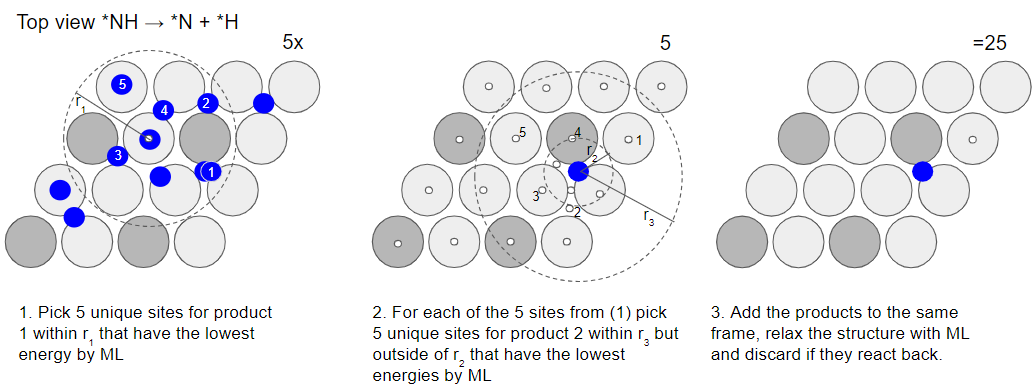

In [10]:
Image(filename="dissociation_scheme.png")

In [11]:
af = AutoFrameDissociation(
            reaction = reaction,
            reactant_system = reactant_configs[reactant_energies.index(min(reactant_energies))],
            product1_systems = product1_configs,
            product1_energies = product1_energies,
            product2_systems = product2_configs,
            product2_energies = product2_energies,
            r_product1_max=2, #r1 in the above fig
            r_product2_max=3, #r3 in the above fig
            r_product2_min=1, #r2 in the above fig
)

In [12]:
nframes = 10
start = time.time()
frame_sets, mapping_idxs = af.get_neb_frames(calc,
                               n_frames = nframes,
                               n_pdt1_sites=4, # = 5 in the above fig (step 1)
                               n_pdt2_sites = 4, # = 5 in the above fig (step 2)
                              )
end = time.time()
print(end - start)

      Step     Time          Energy         fmax
BFGS:    0 22:56:05       -0.978427        0.9817
BFGS:    1 22:56:08       -0.997844        0.7766
BFGS:    2 22:56:11       -1.038522        0.5636
BFGS:    3 22:56:14       -1.052417        0.6305
BFGS:    4 22:56:18       -1.070843        0.6205
BFGS:    5 22:56:21       -1.092201        0.4739
BFGS:    6 22:56:24       -1.117050        0.3731
BFGS:    7 22:56:27       -1.120718        0.2474
BFGS:    8 22:56:31       -1.125842        0.0972
BFGS:    9 22:56:34       -1.126957        0.0559
BFGS:   10 22:56:37       -1.126787        0.0376
      Step     Time          Energy         fmax
BFGS:    0 22:56:40       -0.977008        0.9258
BFGS:    1 22:56:44       -0.994740        0.7233
BFGS:    2 22:56:48       -1.037036        0.5838
BFGS:    3 22:56:51       -1.051592        0.6297
BFGS:    4 22:56:54       -1.068284        0.6411
BFGS:    5 22:56:57       -1.089416        0.4858
BFGS:    6 22:57:01       -1.116556        0.3720
BF

/home/jovyan/CatTSunami/ocpneb/core/autoframe.py:1542: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  alpha = torch.range(0, num_frames - 1, device=device) / (num_frames - 1)


338.77597999572754


## Run NEBs

In [ ]:
## This will run all NEBs enumerated - to just run one, run the code cell below.
# On GPU, each NEB takes an average of ~1 minute so this could take around a half hour on GPU
# But much longer on CPU
# Remember that not all NEBs will converge -- the k, nframes would be adjusted to achieve convergence

# fmax = 0.05 # [eV / ang**2]
# delta_fmax_climb = 0.4
# converged_idxs = []

# for idx, frame_set in enumerate(frame_sets):
#     neb = OCPNEB(
#         frame_set,
#         checkpoint_path=CHECKPOINT_PATH,
#         k=1,
#         batch_size=8,
#     )
#     optimizer = BFGS(
#         neb,
#         trajectory=f"n2_dissoc_on_Ru_{idx}.traj",
#     )
#     conv = optimizer.run(fmax=fmax + delta_fmax_climb, steps=200)
#     if conv:
#         neb.climb = True
#         conv = optimizer.run(fmax=fmax, steps=300)
#         if conv:
#             converged_idxs.append(idx)
            
# print(converged_idxs)

In [13]:
# If you run the above cell -- dont run this one
start = time.time()
fmax = 0.05 # [eV / ang**2]
delta_fmax_climb = 0.4
neb = OCPNEB(
    frame_sets[0],
    checkpoint_path=CHECKPOINT_PATH,
    k=1,
    batch_size=8,
)
optimizer = BFGS(
    neb,
    trajectory=f"n2_dissoc_on_Ru_0.traj",
)
conv = optimizer.run(fmax=fmax + delta_fmax_climb, steps=200)
if conv:
    neb.climb = True
    conv = optimizer.run(fmax=fmax, steps=300)
    
end = time.time()
print(end - start)

      Step     Time          Energy         fmax
BFGS:    0 23:01:47       -0.462891        3.5795
BFGS:    1 23:01:48       -0.546387        2.6656
BFGS:    2 23:01:49       -0.705566        9.2804
BFGS:    3 23:01:50       -0.686035        1.8334
BFGS:    4 23:01:51       -0.735840        1.3785
BFGS:    5 23:01:52       -0.802734        1.8488
BFGS:    6 23:01:53       -0.816895        0.8110
BFGS:    7 23:01:54       -0.850098        0.6603
BFGS:    8 23:01:56       -0.868652        0.6875
BFGS:    9 23:01:57       -0.893066        0.4582
BFGS:   10 23:01:58       -0.907715        0.5007
BFGS:   11 23:01:59       -0.917480        0.3365
BFGS:   12 23:02:01       -0.925781        0.2925
BFGS:   13 23:02:02       -0.931641        0.2243
BFGS:   14 23:02:03       -0.934570        0.1942
BFGS:   15 23:02:04       -0.937500        0.1522
BFGS:   16 23:02:05       -0.938965        0.1396
BFGS:   17 23:02:06       -0.940430        0.1254
BFGS:   18 23:02:07       -0.941406        0.0703
B

## Visualize the results

In [ ]:
optimized_neb = read(f"n2_dissoc_on_Ru_{converged_idxs[0]}.traj", ":")[-1*nframes:]

In [ ]:
es  = []
for frame in optimized_neb:
    frame.set_calculator(calc)
    es.append(frame.get_potential_energy())

In [ ]:
# Plot the reaction coordinate

es = [e - es[0] for e in es]
plt.plot(es)
plt.xlabel("frame number")
plt.ylabel("relative energy [eV]")
plt.title(f"N2 dissociation on Ru(0001), Ea = {max(es):1.2f} eV")
plt.savefig("N2_dissoc_on_Ru_0001.png")

In [ ]:
# Make an interative html file of the optimized neb trajectory
x3d = X3D(optimized_neb)
x3d.write("optimized_neb_n2_disoc_on_Ru0001.html")